In [21]:
 # To use the venv as jupyter kernel
 # python -m ipykernel install --user --name tp2 --display-name "Python (tp2)"

In [22]:
import itertools
import sys

import mpl_toolkits.mplot3d.proj3d

sys.path.append('src/')

In [ ]:
import importlib
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import tp2
from tp2.perceptron import ThresholdUnit, NonLinearUnit
from tp2.multilayer import MultilayerNetwork, MultilayerTrainer
from tp2.multilayer import SingleAttemptMultilayerTrainer, SimulatedAnnealingMultilayerTrainer
import tp2.aux as tp2Aux
import pickle

In [ ]:
importlib.reload(tp2.perceptron)
importlib.reload(tp2.multilayer)

In [ ]:
importlib.reload(tp2Aux)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

### 1. Implemente un perceptrón simple que aprenda la función lógica AND de 2 y de 4 entradas. Lo mismo para la función lógica OR. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.

#### AND de dos entradas

Tabla de entradas / salidas

In [ ]:
and_truth_table = [
        ((1, 1), [1]),
        ((1, -1), [-1]),
        ((-1, 1), [-1]),
        ((-1, -1), [-1])
    ]

tp2Aux.train_data_to_df(and_truth_table)

Pesos tras el entrenamiento. El 0 corresponde al bias, modelado como una entrada constante $x_0 = -1$

In [ ]:
tu_and=ThresholdUnit()
tu_and.train(and_truth_table)
tp2Aux.weights_to_df(tu_and)

La ecuación de la recta de decisión es $-w_0 + x_1 w_1 + x2_2 = 0$

In [ ]:
tp2Aux.plot_2d_tu(tu_and)

#### OR de dos entradas

Tabla de entradas / salidas

In [ ]:
or_truth_table = [
        ((1, 1), [1]),
        ((1, -1), [1]),
        ((-1, 1), [1]),
        ((-1, -1), [-1])
    ]

tp2Aux.train_data_to_df(or_truth_table)

Pesos tras el entrenamiento. El 0 corresponde al bias, modelado como una entrada constante $x_0 = -1$

In [ ]:
tu_or=ThresholdUnit()
tu_or.train(or_truth_table)
tp2Aux.weights_to_df(tu_or)

In [ ]:
tp2Aux.plot_2d_tu(tu_or)

#### AND de 4 entradas

Tabla de entradas / salidas

In [ ]:
and4_truth_table = [
    (( 1,  1,  1,  1), [ 1]),
    (( 1,  1,  1, -1), [-1]),
    (( 1,  1, -1,  1), [-1]),
    (( 1,  1, -1, -1), [-1]),
    (( 1, -1,  1,  1), [-1]),
    (( 1, -1,  1, -1), [-1]),
    (( 1, -1, -1,  1), [-1]),
    (( 1, -1, -1, -1), [-1]),
    ((-1,  1,  1,  1), [-1]),
    ((-1,  1,  1, -1), [-1]),
    ((-1,  1, -1,  1), [-1]),
    ((-1,  1, -1, -1), [-1]),
    ((-1, -1,  1,  1), [-1]),
    ((-1, -1,  1, -1), [-1]),
    ((-1, -1, -1,  1), [-1]),
    ((-1, -1, -1, -1), [-1]),
        
    ]

tp2Aux.train_data_to_df(and4_truth_table)

Pesos tras el entrenamiento. El 0 corresponde al bias, modelado como una entrada constante $x_0 = -1$

In [ ]:
tu_and4=ThresholdUnit()
tu_and4.train(and4_truth_table)
tp2Aux.weights_to_df(tu_and4)

#### OR de 4 entradas

In [ ]:
or4_truth_table = [
    (( 1,  1,  1,  1), [ 1]),
    (( 1,  1,  1, -1), [ 1]),
    (( 1,  1, -1,  1), [ 1]),
    (( 1,  1, -1, -1), [ 1]),
    (( 1, -1,  1,  1), [ 1]),
    (( 1, -1,  1, -1), [ 1]),
    (( 1, -1, -1,  1), [ 1]),
    (( 1, -1, -1, -1), [ 1]),
    ((-1,  1,  1,  1), [ 1]),
    ((-1,  1,  1, -1), [ 1]),
    ((-1,  1, -1,  1), [ 1]),
    ((-1,  1, -1, -1), [ 1]),
    ((-1, -1,  1,  1), [ 1]),
    ((-1, -1,  1, -1), [ 1]),
    ((-1, -1, -1,  1), [ 1]),
    ((-1, -1, -1, -1), [-1]),
    ]

tp2Aux.train_data_to_df(or4_truth_table)

In [ ]:
tu_or4=ThresholdUnit()
tu_or4.train(or4_truth_table)
tp2Aux.weights_to_df(tu_or4)

### 2. Determine numéricamente cómo varia la capacidad del perceptrón simple en función del número de patrones enseñados.

Se configuró una Threshold Unit (perceptron que utiliza la función signo) con $N = [1 .. 10]$ entradas.

Para cada configuración, y se entrena con K pares de entrada/salida  $(\mathbf{x}, y )$ aleatorios.

$\mathbf{x}$ es un vector de $N$ entradas aleatorias de distribución $U_{-1,1}$, $y$ una Bernoulli ${[-1,1]}$ con $P(\frac{1}{2})$

Mediante método de Montecarlo se estima la tasa de éxito de un entrenamiento de $K$ muestras aleatorias en un perceptrón de $N$ entradas, comenzando con $K=1$. El experimento se repite hasta obtener estimadores de la tasa de éxito con un error de $\pm 0.02$ en un intervalo de confianza del $95\%$

Para el caso de $N=1$ el método se validó contra el análisis analítico de la tasa de éxito. Se encontró que para 1000 de iteraciones y velocidad de convergencia $\eta=0.01$ seleccionados, el entrenamiento no encontraba solución a casos linealmente separables. Aún así se determinó que esos errores no modificaban considerablemente la salida del Montecarlo.

In [ ]:
dfCap=pd.read_csv("data/capacity.csv", usecols= lambda x: x in ["dim", "pmax", "cap"]).sort_values(["dim", "pmax"])

for dim,dim_cap in dfCap.groupby("dim"):
    plt.plot( dim_cap["pmax"]/dim_cap["dim"], dim_cap["cap"], label=int(dim))

plt.xlabel("pmax/N")
plt.ylabel("capacity")
plt.legend(title="N")
plt.title("Capacidad de una Threshold Unit")

Se observa que el ThresholdUnit tiene capacidad cercana a 1 para $\frac{\mathrm{pmax}}{N} \lt 1.5$

### 3. a) Implemente un perceptrón multicapa que aprenda la función lógica XOR de 2 y de 4 entradas (utilizando el algoritmo Backpropagation).

Se comienza reimplementando el perceptrón simple utilizando Non Linear Units con $tanh$ como función de activación.
Se optimizan los pesos aplicando gradiente descendente sobre la función consto $C$

$C = \sum_k ( \zeta_k - g(\mathbf{w}^\mathrm{T} \cdot \mathbf{x_k}) )^2$

$\nabla C = \sum_k 2 ( \zeta_k - g(\mathbf{w}^\mathrm{T} \cdot \mathbf{x_k}))  g'(\mathbf{w}^\mathrm{T} \cdot \mathbf{x_k}) \mathbf{x_k}$

Se ensaya el correcto funcionamiento de la Non Linear Unit aprendiendo la función OR

In [ ]:
nlu_or=NonLinearUnit()
nlu_or.train(or_truth_table)
tp2Aux.train_data_to_df([ (x,nlu_or.process(x)) for x,y in or_truth_table])

Se implementa una red multi capa en base a las non linear units. Los pesos se inicializan de manera aleatoria y se optimizan mediante gradiente descendiente y back-propagation. El algoritmo se detiene cuando no detecta mejoras significativas en la función costo.
En caso de converger a un mínimo local, se reinicializa el algoritmo en otro punto.

#### Función XOR de 2 compuertas

In [ ]:
xor_gate_table = [
    ((1, 1), (-1,)),
    ((1, -1), (1,)),
    ((-1, 1), (1,)),
    ((-1, -1), (-1,))
]

tp2Aux.train_data_to_df(xor_gate_table)

In [ ]:
mn_xor2=MultilayerNetwork([2,2,1])
trainer_xor2 = MultilayerTrainer(mn_xor2,xor_gate_table,1)
xor2_costs=[]
trainer_xor2.cost_callback = lambda x: xor2_costs.append(x)
trainer_xor2.train()
tp2Aux.train_data_to_df([ (x,mn_xor2.process(x)) for x,y in xor_gate_table])

#### Función XOR de 4 compuertas

In [ ]:
large_xor_gate_table = [
    (( 1,  1,  1,  1), (-1,)),
    (( 1,  1,  1, -1), (-1,)),
    (( 1,  1, -1,  1), (-1,)),
    (( 1,  1, -1, -1), (-1,)),
    (( 1, -1,  1,  1), (-1,)),
    (( 1, -1,  1, -1), (-1,)),
    (( 1, -1, -1,  1), (-1,)),
    (( 1, -1, -1, -1), ( 1,)),
    ((-1,  1,  1,  1), (-1,)),
    ((-1,  1,  1, -1), (-1,)),
    ((-1,  1, -1,  1), (-1,)),
    ((-1,  1, -1, -1), ( 1,)),
    ((-1, -1,  1,  1), (-1,)),
    ((-1, -1,  1, -1), ( 1,)),
    ((-1, -1, -1,  1), ( 1,)),
    ((-1, -1, -1, -1), (-1,)),
]

tp2Aux.train_data_to_df(large_xor_gate_table)

In [ ]:
nn_xor4=MultilayerNetwork([4,2,1])
trainer_xor4 = MultilayerTrainer(nn_xor4,large_xor_gate_table,1)
xor4_costs=[]
trainer_xor4.cost_callback = lambda x: xor4_costs.append(x)
trainer_xor4.train()
tp2Aux.train_data_to_df([ (x,nn_xor4.process(x)) for x,y in large_xor_gate_table])

### 3. b) Muestre cómo evoluciona el error durante el entrenamiento.

In [ ]:
plt.plot(xor2_costs)
plt.yscale("log")
plt.xlabel("step")
plt.ylabel("cost")
plt.title("2 gates xor")

In [ ]:
plt.plot(xor4_costs)
plt.yscale("log")
plt.xlabel("step")
plt.ylabel("cost")
plt.title("4 gates xor")

En la evolución del costo para la xor de 4 entradas se observa que el costo se estanca en mínimos locales y es necesario reiniciar el algoritmo.
La búsqueda del mínimo se facilita si se expande de 2 a 5 neuronas la capa oculta.

In [ ]:
np.warnings.filterwarnings('default', category=np.VisibleDeprecationWarning)
mn_xor4_h5=MultilayerNetwork([4,5,1])
trainer_xor4_h5 = MultilayerTrainer(mn_xor4_h5,large_xor_gate_table,1)
trainer_xor4_h5.learning_rate=0.001
xor4_costs_h5=[]
trainer_xor4_h5.cost_callback = lambda x: xor4_costs_h5.append(x)
trainer_xor4_h5.train()

In [ ]:
plt.plot(xor4_costs_h5)
plt.yscale("log")
plt.xlabel("step")
plt.ylabel("cost")
plt.title("4 gates xor")

### 3. c) Para una red entrenada en la función XOR de dos entradas, grafique el error en función de dos pesos cualesquiera de la red. De ejemplos de mínimos locales y mesetas.

Se plotean las curvas de nivel para todos los pares de pesos posibles.
Las coordenadas de los pesos se leen de la siguiente forma. Una coordenada $(a,(b,c))$, representa el peso en el layer $a$, desde la entrada $V_b$ a la neurona $c$.
La entrada $b=0$ corresponde al bias modelado como una entrada constante $v_0=-1$

In [ ]:
importlib.reload(tp2Aux)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
tp2Aux.plot_all_cuts(trainer_xor2,xor_gate_table)

En los cortes inspeccionados no se detectaron algunos mínimos locales. Por ejemplo en el gráfico de la coordenada (0,(1,1)) vs (1,(2,0)) hay un mínimo entre las curvas de nivel de 1.5 y 3.  Esto coincide con los mínimos locales de costo alrededor de 1.7 en los que a veces se estanca el optimizador.

En los cortes donde las curvas de nivel corren verticalmente, puede asociarse a mesetas. Por ejemplo el gráfico de la coordenada (0,(0,0)) vs (0,(1,0)), pueden observarse mesetas en 8 y en 0

### 3. d) Idem (c) pero computando el error para cada patrón de entrada por separado.

In [ ]:
importlib.reload(tp2Aux)
plt.rcParams['figure.figsize'] = (25.0, 5.0)
tp2Aux.plot_all_cuts_per_sample(trainer_xor2,xor_gate_table)

En los gráficos individuales se observa que hay pesos que se afectan el costo de solo parte de las entradas.
También se aprecia como la composición final del costo está determinada por la suma de los costos de las entradas individuales.

### 4. a) Implemente una red con aprendizaje Backpropagation que aprenda la siguiente función $f(x, y, z) = \sin(x) + \cos(y) + z$ donde: $x, y \in [0, 2\pi]$ y $z \in [−1,1]$. Para ello construya un conjunto de datos de entrenamiento y un conjunto de evaluación. Muestre el error en función de las épocas de entrenamiento.

In [ ]:
# def cleanLastPrintedLine():
#     print(" " * 100, end='\r')
#
# def func_logging(func_costs, cost):
#     cleanLastPrintedLine()
#     print(cost, end='\r')
#     func_costs.append(cost)
#
# training_samples, testing_samples = tp2Aux.Exercise4.generate_dataset(20, 0.8)
# layers = [3, 25, 1]
# func_costs = []
# mn = MultilayerNetwork(layers)
# mn.perceptrons[-1].activator = lambda x: x
# trainer = SingleAttemptMultilayerTrainer(mn, training_samples, 1)
# trainer.cost_callback = lambda x: func_logging(func_costs, x)
# trainer.learning_rate = 0.01
# trainer.train()

In [ ]:
with open("data/minibatch.pkl","rb") as fi:
    sim_data = pickle.load(fi)

In [ ]:
for data in sim_data:
    error = [pair[0] for pair in data[3]]
    plt.plot(error, label = "(%i, %0.3f)" % data[:2])
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("cost")
#plt.legend(title = "minibatch, learning rate")
plt.title("sin(x)+cos(y)+z")

Se realizó un barrido de 1000 epochs con learning rates entre 0.1 y 0.001, y distintos tamaños de minibatch. Se observa que la mayoría de las configuraciones no minimizan la función costo a valores interesantes.

In [ ]:
filtered_data = [data for data in sim_data if data[3][-1][0] < 0.4]
for data in filtered_data:
    error = [pair[0] for pair in data[3]]
    plt.plot(error, label = "(%i, %0.3f)" % data[:2])
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.legend(title = "minibatch, learning rate")
plt.title("sin(x)+cos(y)+z")
filtered_data = sim_data

In [ ]:
filtered_data = [data for data in sim_data if data[3][-1][0] < 0.1]
for data in filtered_data:
    error = [pair[0] for pair in data[3]]
    plt.plot(error, label = "(%i, %0.3f)" % data[:2])
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.legend(title = "minibatch, learning rate")
plt.title("sin(x)+cos(y)+z")
filtered_data = sim_data


In [ ]:
sim_data[0][3][-1][0] < 1

In [ ]:
## 6 Encontrar un perceptrón multicapa que resuelva una XOR de 2 entradas mediantesimulated annealing. Graficar el error a lo largo del proceso de aprendizaje

In [ ]:
layers = [2, 2, 1]
mn = MultilayerNetwork(layers)
annealing_trainer = SimulatedAnnealingMultilayerTrainer(mn, xor_gate_table)
annealing_costs=[]
annealing_trainer.temperature_callback = lambda t,c: annealing_costs.append([t,c])
annealing_trainer.train()

In [ ]:
annealing_array=np.array(annealing_costs)
plt.plot(annealing_array[:,0],annealing_array[:,1])
plt.yscale("log")
plt.xlabel("temperature")
plt.ylabel("cost")
plt.xlim(plt.xlim()[::-1])
plt.title("2 Gates XOR with simmulated annealing")

In [39]:
layers = [2, 2, 1]
mn = MultilayerNetwork(layers)
annealing_trainer = SimulatedAnnealingMultilayerTrainer(mn, xor_gate_table)
annealing_costs=[]
annealing_trainer.temperature_callback = lambda t,c: annealing_costs.append([t,c])
annealing_trainer.train()

Text(0.5, 1.0, '2 Gates XOR with simmulated annealing')

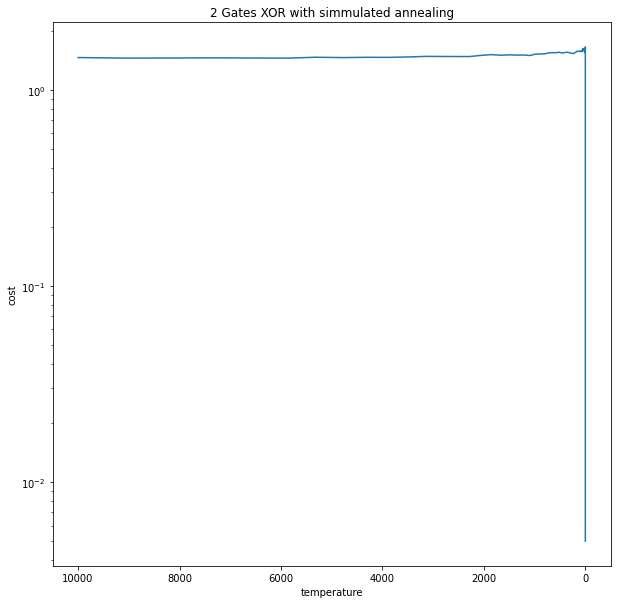

In [53]:
annealing_array=np.array(annealing_costs)
plt.plot(annealing_array[:,0],annealing_array[:,1])
plt.yscale("log")
plt.xlabel("temperature")
plt.ylabel("cost")
plt.xlim(plt.xlim()[::-1])
plt.title("2 Gates XOR with simmulated annealing")

In [44]:
x=[1,2]

In [48]:
x[-1:0,-1]

TypeError: list indices must be integers or slices, not tuple